In [2]:
from IPython.display import Image

--------------
## statistical functions
-----------------------

NumPy has quite a few useful statistical functions for finding minimum, maximum, percentile standard deviation and variance, etc. from the given elements in the array. 

----------------------
#### UNDERSTANDING RELATIONSHIPS
--------------------

- `Positive correlation` exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
- `Negative correlation` exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
- `Weak or no correlation` exists if there is no such apparent relationship.

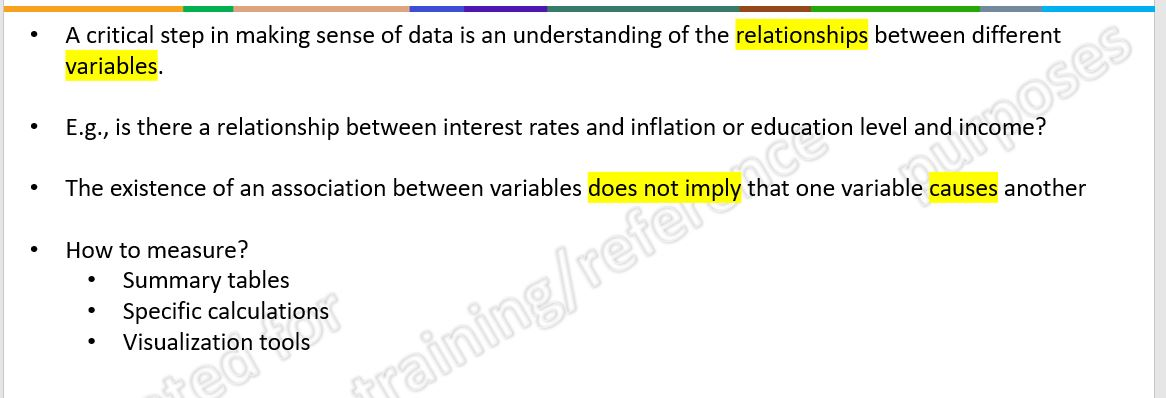

In [35]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-31.JPG', width=800)

#### Scatterplots

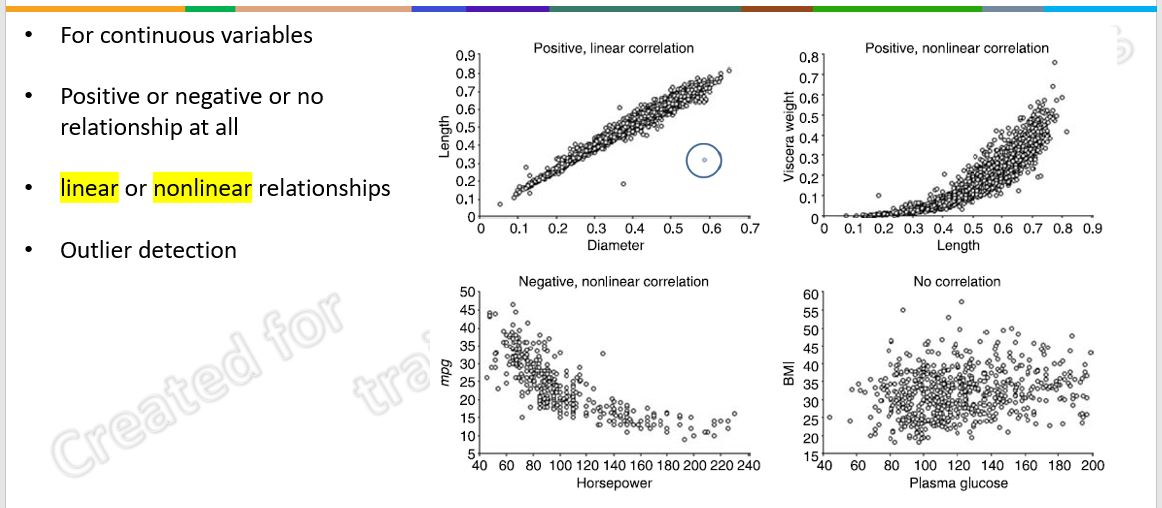

In [36]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-32.JPG', width=800)

#### Summary tables – describe method

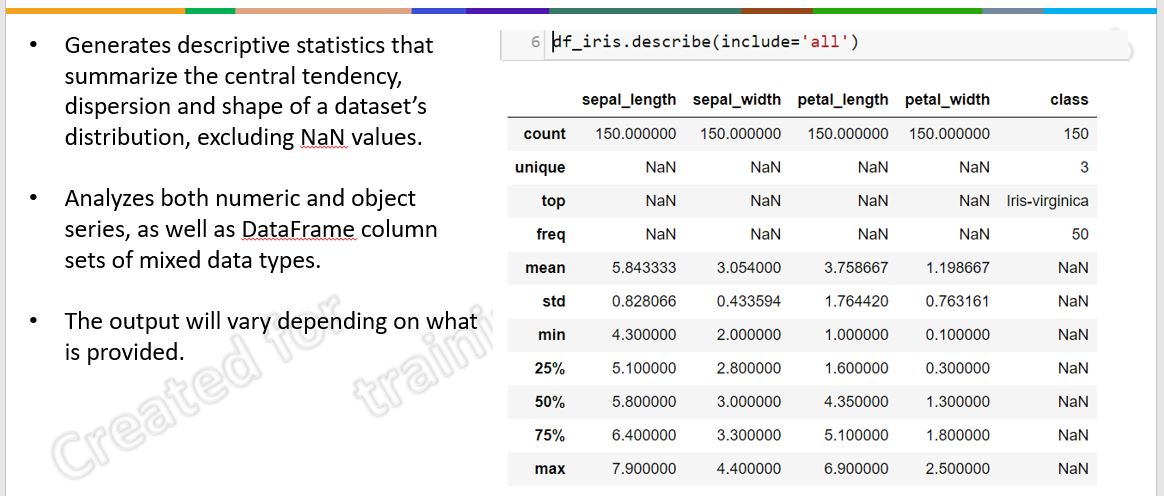

In [37]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-33.JPG', width=800)

In [9]:
import numpy as np 
import pandas as pd

##### Covariance - COV

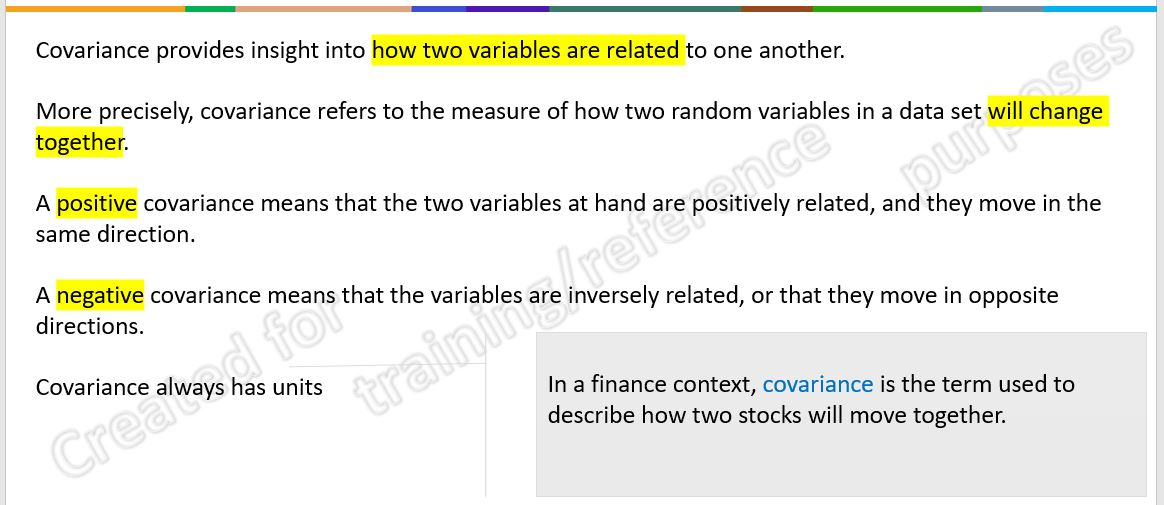

In [39]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-35.JPG', width=800)

##### Calculate Covariance - COV

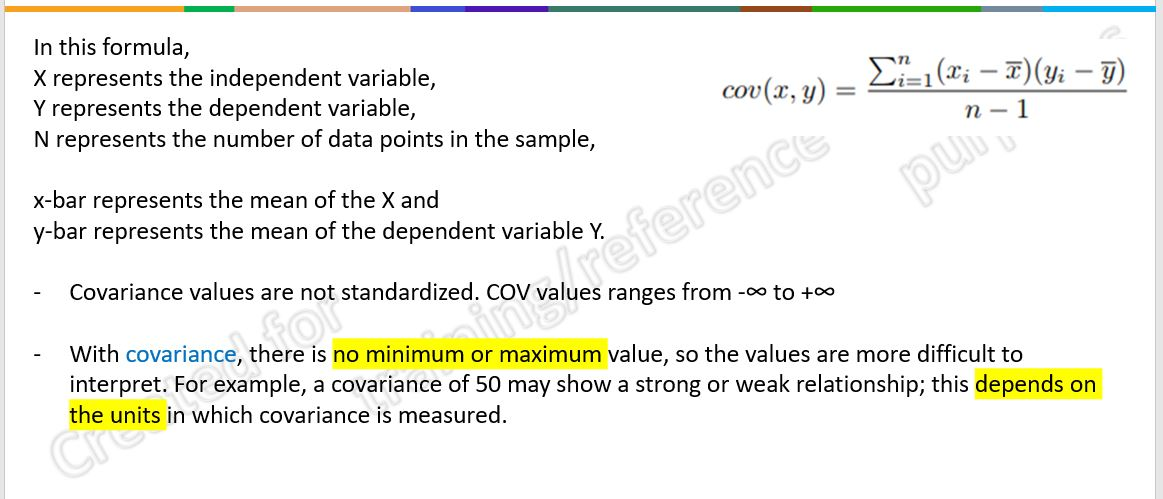

In [5]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-36.JPG', width=800)

In [7]:
# negative COV
# data = np.array([[18, 5],
#                  [15, 11],
#                  [11, 13],
#                  [10, 16],
#                  [8, 14], 
#                  [5.5, 16]])

# positive COV
data = np.array([[5, 8],
                 [7, 11],
                 [11, 13],
                 [16, 16],
                 [18, 24], 
                 [23, 36]])

# No COV
# data = np.array([[5, 5],
#                  [7, 6.7],
#                  [11, 6.1],
#                  [16, 5.6],
#                  [18, 5.1], 
#                  [23, 6]])


In [8]:
x_bar = np.round(np.mean(data[:, 0]), 4)
y_bar = np.round(np.mean(data[:, 1]), 4)

In [10]:
x_bar, y_bar

(13.3333, 18.0)

In [11]:
df = pd.DataFrame(data, columns=['x1', 'x2'])

df['x1-mean'] = df.x1 - x_bar
df['x2-mean'] = df.x2 - y_bar

df['x1x2']    = (df.x1 - x_bar) * (df.x2 - y_bar)
df

,x1,x2,x1-mean,x2-mean,x1x2
0,5,8,-8.3333,-10.0,83.3330
1,7,11,-6.3333,-7.0,44.3331
2,11,13,-2.3333,-5.0,11.6665
3,16,16,2.6667,-2.0,-5.3334
4,18,24,4.6667,6.0,28.0002
5,23,36,9.6667,18.0,174.0006


In [12]:
np.sum(df.x1x2)/(df.shape[0]-1)

67.2

using numpy ...

`numpy.cov`

- Estimate a covariance matrix, given data and weights.

- Covariance indicates the level to which two variables vary together. 

- If we examine N-dimensional samples, $X = [x_1, x_2, ... x_N]^T$, then the covariance matrix element $C_{ij}$ is the covariance of $x_i$ and $x_j$. The element $C_{ii}$ is the variance of $x_i$.

In [13]:
x_, y_ = np.array(data[:, 0]), np.array(data[:, 1])

In [14]:
np.cov(x_, y_)

array([[ 47.46666667,  67.2       ],
       [ 67.2       , 107.6       ]])

A COV matrix is also denoted by SIGMA, $\Large \Sigma$

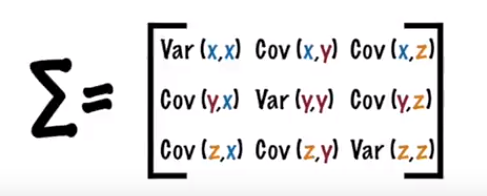

##### what does the COV mean (intuition)

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

In [16]:
x_bar = np.round(np.mean(data[:, 0]), 4)
y_bar = np.round(np.mean(data[:, 1]), 4)

x_bar, y_bar

(13.3333, 18.0)

In [17]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df['x1-mean'] = df.x1 - x_bar
df['x2-mean'] = df.x2 - y_bar
df

,x1,x2,x1-mean,x2-mean
0,5,8,-8.3333,-10.0
1,7,11,-6.3333,-7.0
2,11,13,-2.3333,-5.0
3,16,16,2.6667,-2.0
4,18,24,4.6667,6.0
5,23,36,9.6667,18.0


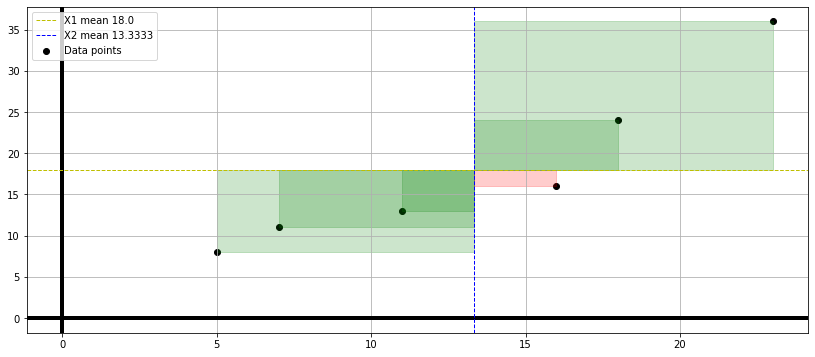

In [18]:
plt.figure(figsize=(14, 6))

ax = plt.gca()
plt.grid()

ax.axhline(linewidth=4, color='k')
ax.axvline(linewidth=4, color='k')

# plot the random number
ax.scatter(data[:, 0], data[:, 1], c='k', label='Data points')

ax.axhline(y= y_bar, linewidth=1, color='y', linestyle="--", label = 'X1 mean {}'.format((y_bar)))
ax.axvline(x= x_bar, linewidth=1, color='b', linestyle="--", label = 'X2 mean {}'.format((x_bar)))

# read all the data points
for idx, row in df.iterrows():
    someX, someY = row.x1, row.x2
    
    dist_x_bar  = someX - x_bar
    dist_y_bar  = someY - y_bar
    
    # positive or negative relation
    if dist_x_bar * dist_y_bar < 0:
        fill_color = ['red']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='r', alpha=.2))
    else:
        fill_color = ['green']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='g', alpha=.2))
            
ax.legend();

##### correlation coefficient

The `correlation coefficient`, or Pearson product-moment correlation coefficient, is denoted by the symbol `𝑟`. 

The `coefficient` is another measure of the `correlation` between data. You can think of it as a standardized covariance. Here are some important facts about it:

- The value 𝑟 > 0 indicates `positive` correlation.
- The value 𝑟 < 0 indicates `negative` correlation.
- The value r = 1 is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
- The value r = −1 is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
- The value r ≈ 0, or when 𝑟 is around zero, means that the correlation between variables is weak.

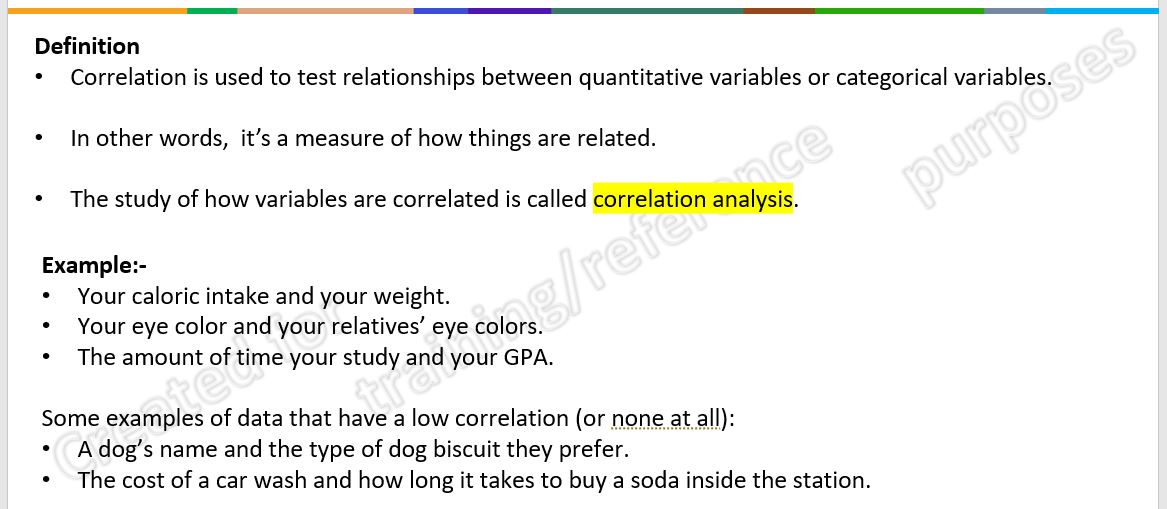

In [41]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-37.JPG', width=800)

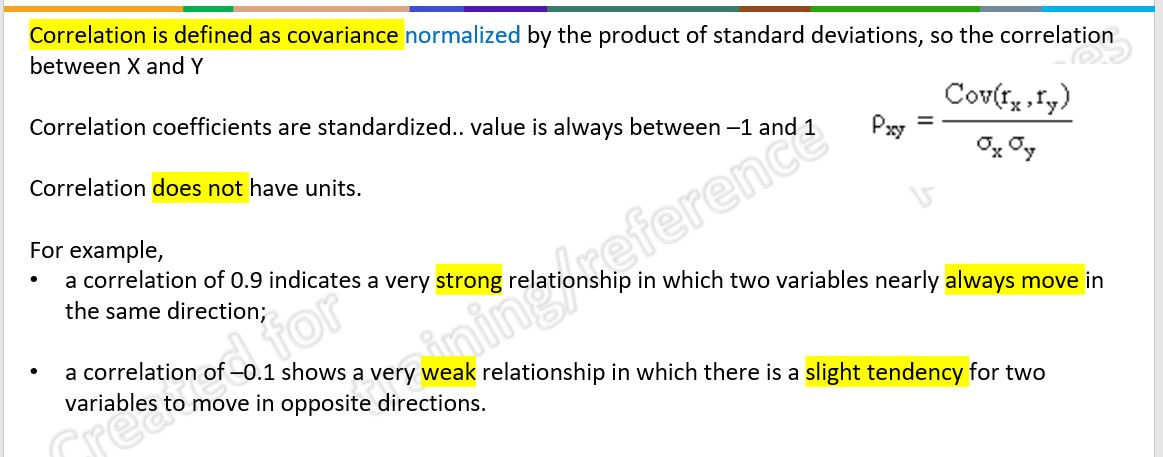

In [42]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-38.JPG', width=800)

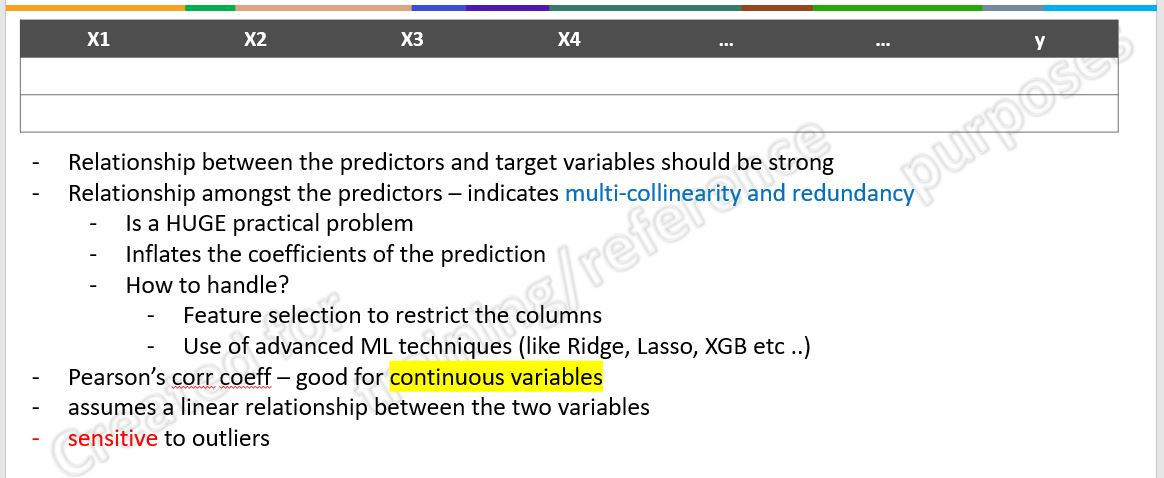

In [45]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-41.JPG', width=800)

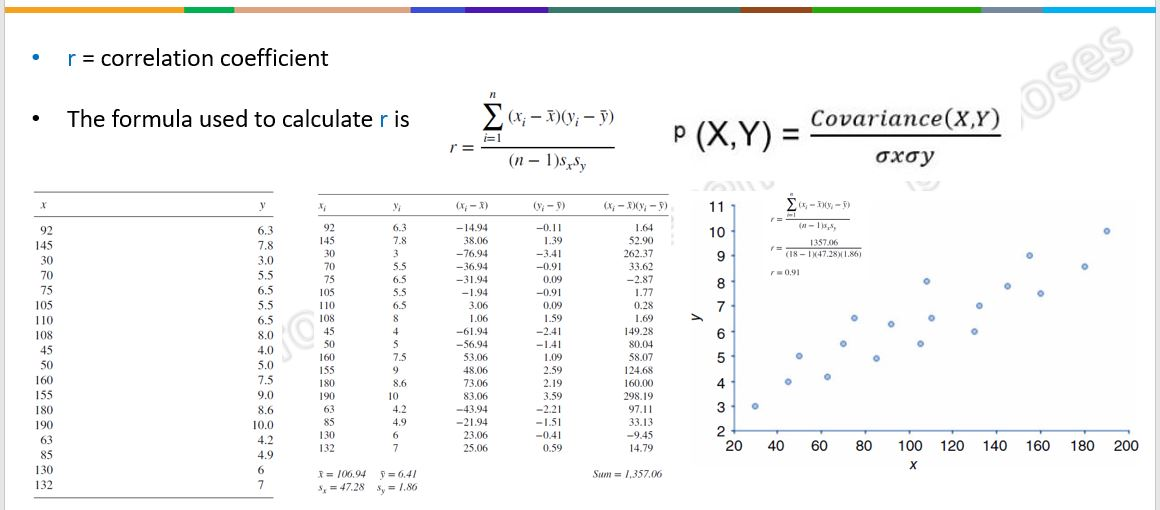

In [43]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-39.JPG', width=800)

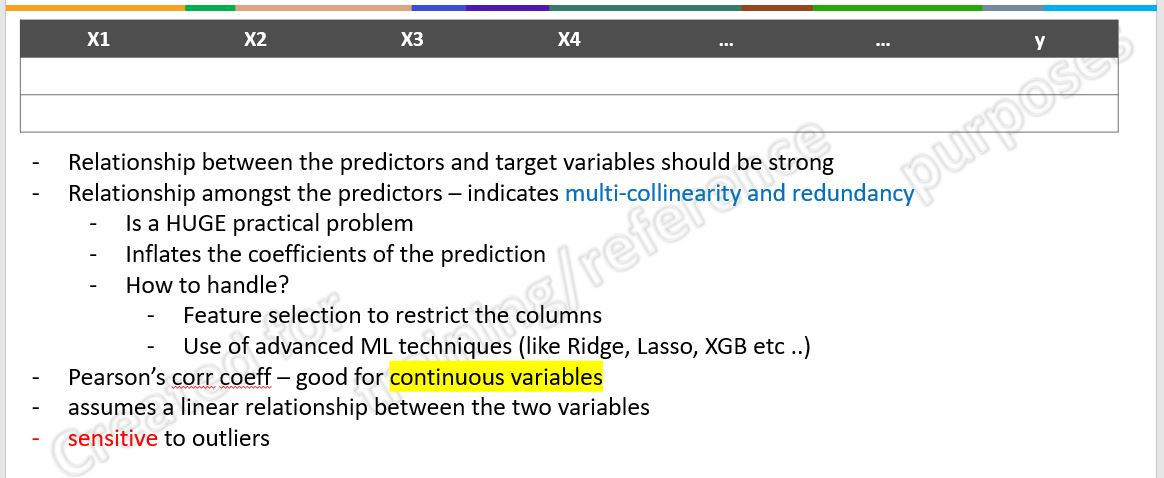

In [45]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-41.JPG', width=800)

In [21]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

x_, y_   = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

In [22]:
n = len(x)

In [23]:
mean_x, mean_y = sum(x) / n, sum(y) / n

In [24]:
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))/ (n - 1))

In [25]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)

std_x, std_y = var_x ** 0.5, var_y ** 0.5

r = cov_xy / (std_x * std_y)
r

0.861950005631606

`numpy.corrcoef`
- Return Pearson product-moment correlation coefficients.

In [27]:
np.corrcoef(x_, y_)

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])